In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np

In [39]:
filepath = '/home/erik/OneDrive/Research/Data/'
filename = 'Comsol_ksq_data_inf.xlsx'
comsol_df = pd.read_excel(filepath + filename)
comsol_df.head()
#DC phase velocity [m/ms]. m/ms * 1000ms / s = m/s
#DC frequency [kHz] 
DC_df = pd.read_csv('DC_dispersion_data.csv')

DC_df['Freq [MHz]'] = DC_df['x']/1000 
DC_df['A0 velocity [m/s]'] = DC_df['A0']*1000 
DC_df['S0 velocity [m/s]'] = DC_df['S0']*1000
DC_df.head()

,lambda,hGan_lmba_rat,EigA,ksqA,w_A,EigS,ksqS,w_S
0,0.000007,19142.906999,4.873727e+08,0.055399,3411.608739,7.391911e+08,0.275333,5174.338011
1,0.000008,16750.043625,4.242468e+08,0.080825,3393.974164,6.909329e+08,0.358071,5527.463200
2,0.000009,14888.927666,3.725859e+08,0.103378,3353.272672,6.549940e+08,0.447887,5894.946000
3,0.000010,13400.034900,3.297956e+08,0.120793,3297.956132,6.250942e+08,0.532800,6250.942437
4,0.000011,12181.849909,2.940948e+08,0.134000,3235.042965,5.977016e+08,0.602086,6574.717380


,x,S0,A0,Freq [MHz],A0 velocity [m/s],S0 velocity [m/s]
0,56,7.7916,0.2843,0.056,284.3,7791.6
1,3964,7.7940,0.5494,3.964,549.4,7794.0
2,9933,7.7978,0.8527,9.933,852.7,7797.8
3,28604,7.8089,1.4357,28.604,1435.7,7808.9
4,47474,7.8176,1.7882,47.474,1788.2,7817.6



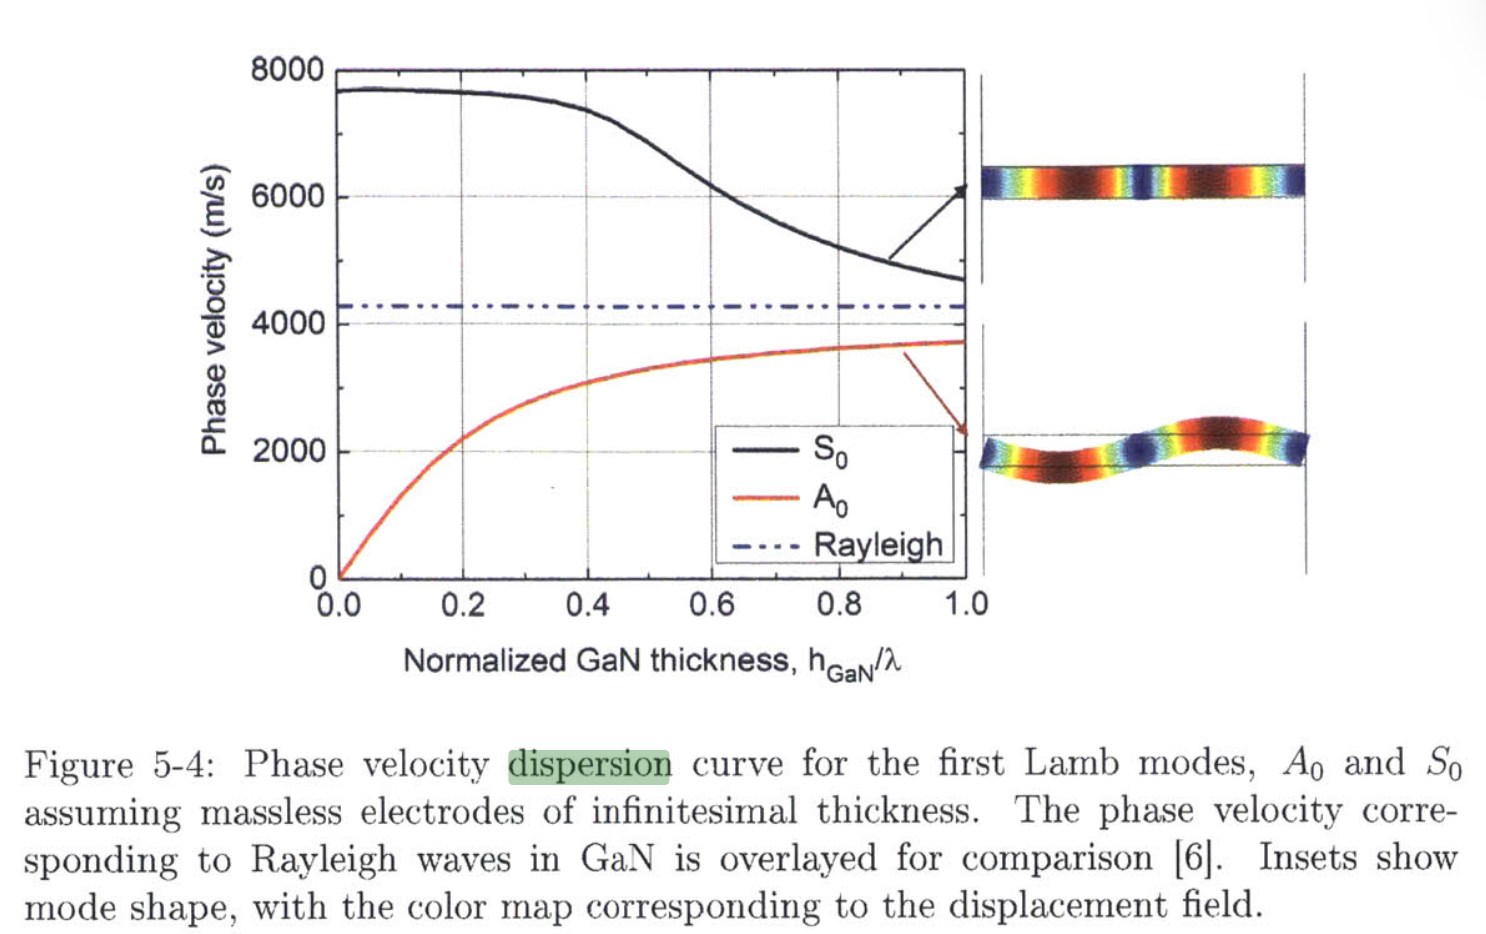
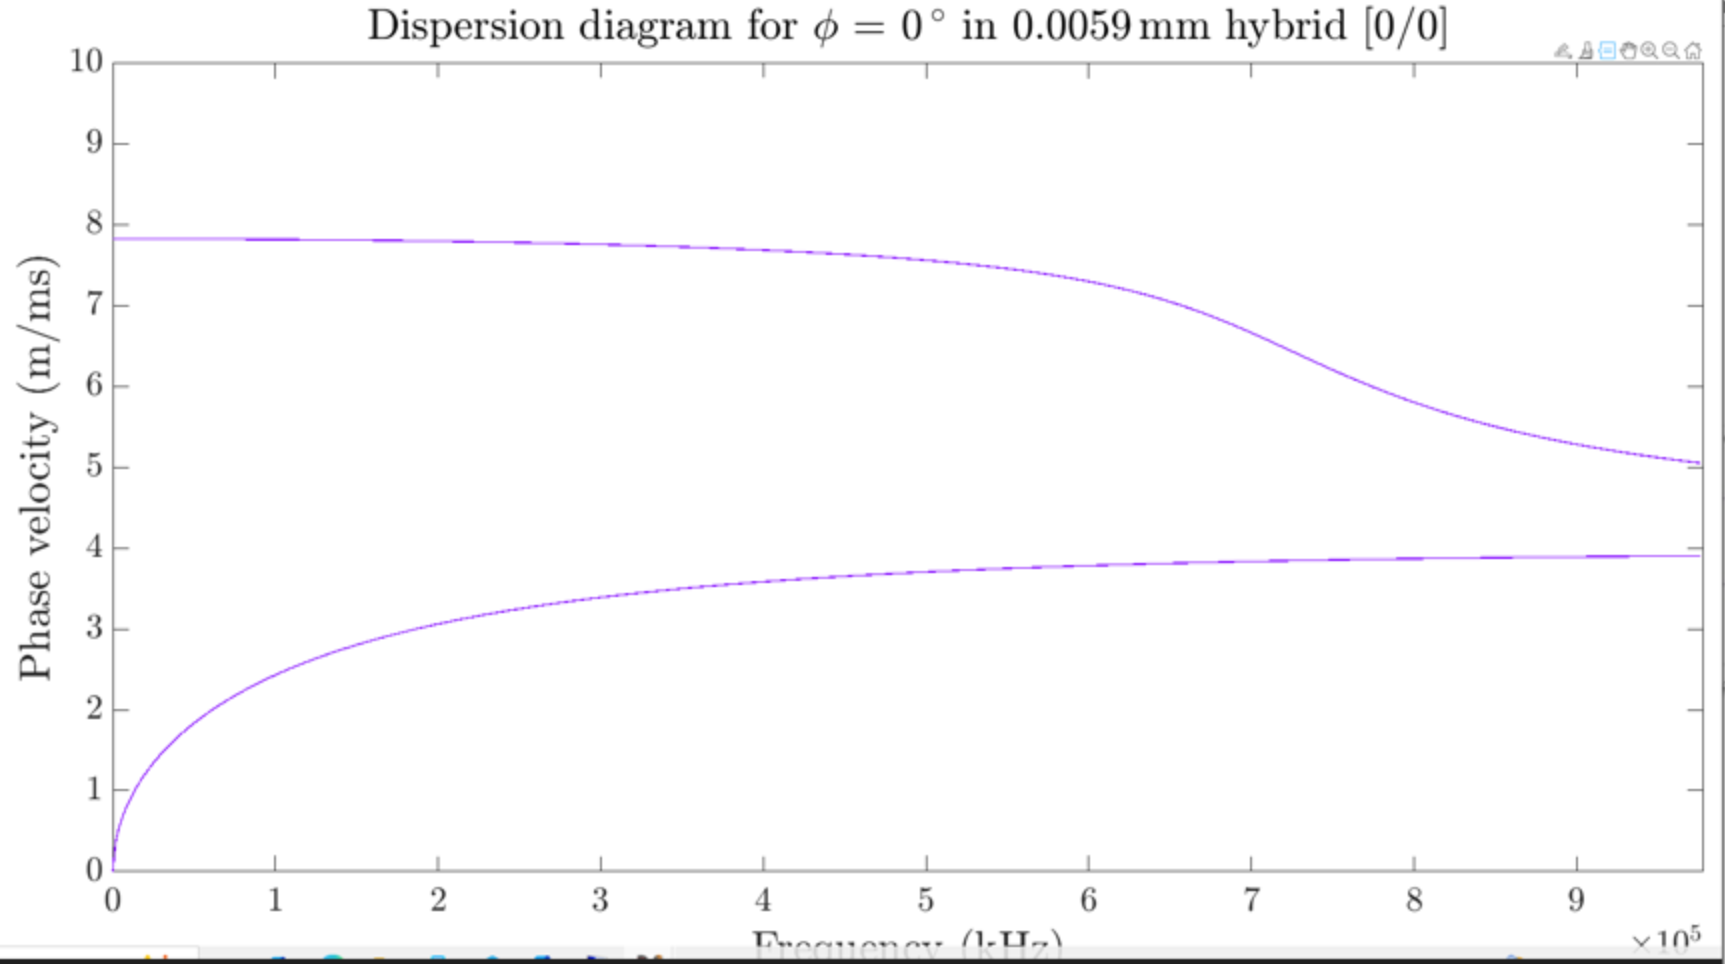

Text(0.5, 0, 'Frequency [MHz]')

Text(0, 0.5, 'Phase Velocity [m/s]')

Text(0.5, 1.0, 'COMSOL vs Dispersion Calculator Phase Velocity')

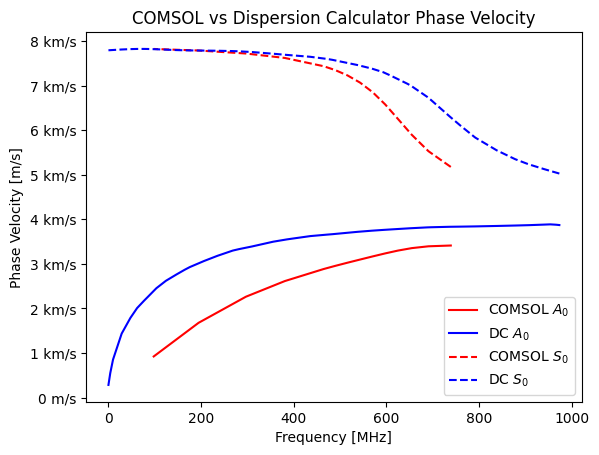

In [34]:
#plot comsol vs DC
#frequency in MHz, velocity in m/s 
# Create the figure and axes
fig, ax = plt.subplots()
formatter = EngFormatter(unit='m/s')
ax.yaxis.set_major_formatter(formatter)
ax.plot( comsol_df['EigS']/1e6, comsol_df['w_A'], color='r', label = 'COMSOL ' + r'$A_0$') 
ax.plot(DC_df['Freq [MHz]'] ,DC_df[ 'A0 velocity [m/s]'], color='b',  label= 'DC ' + r'$A_0$')
ax.plot( comsol_df['EigS']/1e6, comsol_df['w_S'], color='r',linestyle='--',  label = 'COMSOL ' +r'$S_0$') 
ax.plot(DC_df['Freq [MHz]'] ,DC_df[ 'S0 velocity [m/s]'], color='b', linestyle='--', label= 'DC ' + r'$S_0$')
ax.legend()
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Phase Velocity [m/s]')
ax.set_title('COMSOL vs Dispersion Calculator Phase Velocity')

In [36]:
#plot comsol vs Popa 
Fig5_4 = pd.read_csv('Popa5-4.csv')
Fig5_4.head()

,x,S0,A0,rayliegh
0,0.00952,7661.1,139.5,4292.4
1,0.01055,7661.1,152.8,4292.4
2,0.01232,7661.1,175.7,4292.4
3,0.05572,7661.4,744.2,4291.5
4,0.07452,7661.1,996.6,4291.1


Text(0.5, 0, '$h_{GaN}/\\lambda$')

Text(0, 0.5, 'Phase Velocity [m/s]')

Text(0.5, 1.0, 'COMSOL vs [Ref] Phase Velocity')

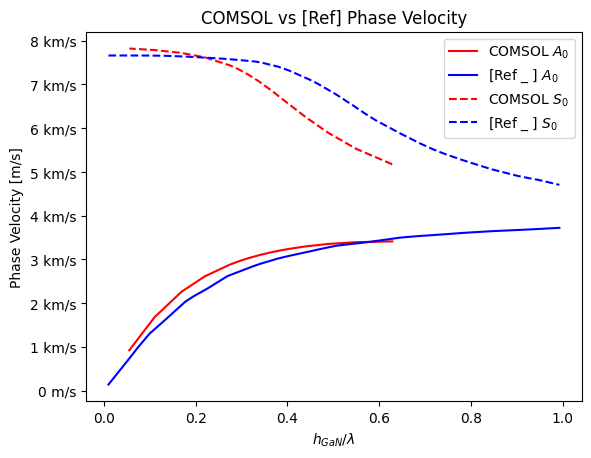

In [45]:
fig, ax = plt.subplots()
formatter = EngFormatter(unit='m/s')
ax.yaxis.set_major_formatter(formatter)
ax.plot( 4.4e-6/comsol_df['lambda'], comsol_df['w_A'], color='r', label = 'COMSOL ' + r'$A_0$') 
ax.plot(Fig5_4['x'], Fig5_4[ 'A0'], color='b',  label= '[Ref _ ] ' + r'$A_0$')
ax.plot( 4.4e-6/comsol_df['lambda'], comsol_df['w_S'], color='r',linestyle='--',  label = 'COMSOL ' +r'$S_0$') 
ax.plot(Fig5_4['x'], Fig5_4[ 'S0'], color='b', linestyle='--', label= '[Ref _ ] ' + r'$S_0$')
ax.legend()
ax.set_xlabel(r'$h_{GaN}/\lambda$')
ax.set_ylabel('Phase Velocity [m/s]')
ax.set_title('COMSOL vs [Ref] Phase Velocity')

In [ ]:
comsol_data = {
    "λ [m]": [7.0E-06, 8.0E-06, 9.0E-06, 1.0E-05, 1.1E-05, 1.2E-05, 1.3E-05, 1.4E-05, 1.5E-05, 1.6E-05, 2.0E-05, 2.6E-05, 4.0E-05, 8.0E-05],
    "hGan / λ": [19142.91, 16750.04, 14888.93, 13400.035, 12181.850, 11166.696, 10307.719, 9571.453, 8933.357, 8375.022, 6700.017, 5153.860, 3350.009, 1675.004],
    "Eig A0": [4.8737E+08, 4.2425E+08, 3.7259E+08, 3.2980E+08, 2.9409E+08, 2.6397E+08, 2.3824E+08, 2.1616E+08, 1.9701E+08, 1.8026E+08, 1.3072E+08, 8.7049E+07, 4.1938E+07, 1.1537E+07],
    "ksq % A0": [0.055, 0.081, 0.103, 0.121, 0.134, 0.143, 0.148, 0.150, 0.152, 0.149, 0.134, 0.105, 0.064, 0.031],
    "Eig S0": [7.3919E+08, 6.9093E+08, 6.5499E+08, 6.2509E+08, 5.9770E+08, 5.7072E+08, 5.4345E+08, 5.1623E+08, 4.8976E+08, 4.6463E+08, 3.8095E+08, 2.9688E+08, 1.9466E+08, 9.7763E+07],
    "ksq % S0": [0.275, 0.358, 0.448, 0.533, 0.602, 0.643, 0.652, 0.641, 0.624, 0.604, 0.560, 0.552, 0.567, 0.576],
    "S0": [5.1743E+03, 5.5275E+03, 5.8949E+03, 6.2509E+03, 6.5747E+03, 6.8486E+03, 7.0649E+03, 7.2272E+03, 7.3464E+03, 7.4340E+03, 7.6190E+03, 7.7188E+03, 7.7863E+03, 7.8211E+03]
}